### 1. 가중치를 적용해 사인함수 예측(근사)하기

In [1]:
import math
import torch
import matplotlib.pyplot as plt

-pi부터 pi 사이에서 1,000개의 점 추출

In [2]:
x = torch.linspace(-math.pi, math.pi, 1000)

In [3]:
x

tensor([-3.1416, -3.1353, -3.1290, -3.1227, -3.1164, -3.1101, -3.1039, -3.0976,
        -3.0913, -3.0850, -3.0787, -3.0724, -3.0661, -3.0598, -3.0535, -3.0473,
        -3.0410, -3.0347, -3.0284, -3.0221, -3.0158, -3.0095, -3.0032, -2.9969,
        -2.9906, -2.9844, -2.9781, -2.9718, -2.9655, -2.9592, -2.9529, -2.9466,
        -2.9403, -2.9340, -2.9278, -2.9215, -2.9152, -2.9089, -2.9026, -2.8963,
        -2.8900, -2.8837, -2.8774, -2.8711, -2.8649, -2.8586, -2.8523, -2.8460,
        -2.8397, -2.8334, -2.8271, -2.8208, -2.8145, -2.8083, -2.8020, -2.7957,
        -2.7894, -2.7831, -2.7768, -2.7705, -2.7642, -2.7579, -2.7516, -2.7454,
        -2.7391, -2.7328, -2.7265, -2.7202, -2.7139, -2.7076, -2.7013, -2.6950,
        -2.6888, -2.6825, -2.6762, -2.6699, -2.6636, -2.6573, -2.6510, -2.6447,
        -2.6384, -2.6321, -2.6259, -2.6196, -2.6133, -2.6070, -2.6007, -2.5944,
        -2.5881, -2.5818, -2.5755, -2.5693, -2.5630, -2.5567, -2.5504, -2.5441,
        -2.5378, -2.5315, -2.5252, -2.51

실제 사인곡선에 x를 대입하여 y(데이터) 만들기

In [4]:
y = torch.sin(x)

예측 사인곡선에 사용할 임의의 가중치(계수 a, b, c, d)와 예측값(y_rand) 만들기

In [20]:
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

In [21]:
y_rand = a*x**3 + b*x**2 + c*x + d

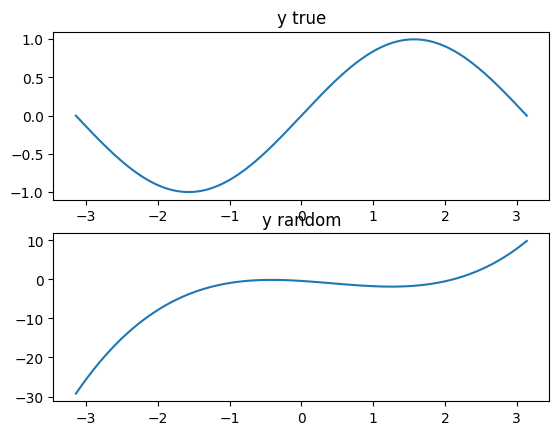

In [22]:
plt.subplot(2, 1, 1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title('y random')
plt.plot(x, y_rand)

plt.show()

학습 후 예측 데이터 얻기     

'학습'이란, 손실(y - y_pred)함수 L을 미분한 값의 반대 방향으로, 학습률만큼 곱한 값을 기존 가중치 a, b, c, d에 더하여 업데이트 한다.     
-> new_a = a - learning_rate * dL/da

In [24]:
learning_rate = 1e-6     # 일반적으로 1e-5 ~ 1e-6

for epoch in range(2000):
    y_pred = a*x**3 + b*x**2 + c*x + d
    loss = (y_pred - y).pow(2).sum().item()    # (y_pred - y) ** 2이 손실(L)
    
    if epoch % 100 == 0:
        print(f'epoch{epoch+1} loss: {loss}')
    
    grad_y_pred = 2.0 * (y_pred - y)     # dL/dy = 2(y_pred - y)
    grad_a = (grad_y_pred * x ** 3).sum()    # dy/da = x ** 3    -> grad_a = dL/da = dL/dy * dy/da
    grad_b = (grad_y_pred * x ** 2).sum()    # x가 1000개의 값을 모은 '벡터'이므로, sum()을 이용해야 함!
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

epoch1 loss: 64850.53125
epoch101 loss: 1907.2032470703125
epoch201 loss: 1547.6474609375
epoch301 loss: 1259.590087890625
epoch401 loss: 1025.3138427734375
epoch501 loss: 834.774169921875
epoch601 loss: 679.8051147460938
epoch701 loss: 553.7645874023438
epoch801 loss: 451.2514953613281
epoch901 loss: 367.87322998046875
epoch1001 loss: 300.0574035644531
epoch1101 loss: 244.8986053466797
epoch1201 loss: 200.03414916992188
epoch1301 loss: 163.54222106933594
epoch1401 loss: 133.86016845703125
epoch1501 loss: 109.71675872802734
epoch1601 loss: 90.07816314697266
epoch1701 loss: 74.1037368774414
epoch1801 loss: 61.10960006713867
epoch1901 loss: 50.53961181640625


loss가 점점 줄어듦 -> 효과적으로 학습됨!

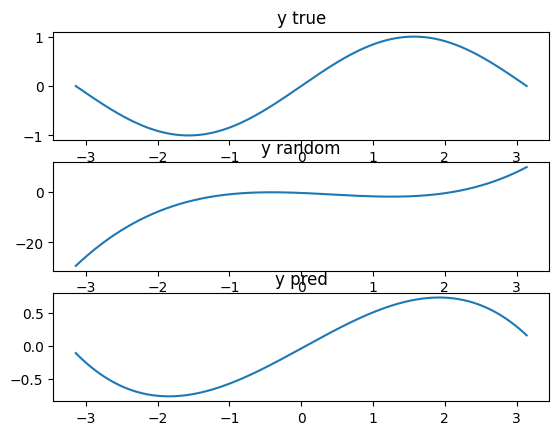

In [25]:
plt.subplot(3, 1, 1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(3, 1, 2)
plt.title('y random')
plt.plot(x, y_rand)

plt.subplot(3, 1, 3)
plt.title('y pred')
plt.plot(x, y_pred)

### 2. 캘리포니아 집값 예측하기: 회귀 분석
- data: 특징값(features)
- target: 예측할 값(정답)
- DESCR: description. 데이터셋 정보

In [27]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [28]:
import pandas as pd
dataFrame = pd.DataFrame(housing['data'])
dataFrame.columns = housing['feature_names']
dataFrame['target'] = housing['target']

print(dataFrame.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [30]:
len(housing.target)

20640

1. 모델(은닉층, 활성화함수) 정의
2. 특징값(X), 정답(Y) 정의
3. 배치 사이즈, 학습률, 최적화함수 정의
4. 배치 사이즈만큼 특징값(x)과 정답(y)을 분할하여 모델에 입력(predict)
5. pred 값과 정답(y)의 loss를 역전파(by 최적화함수)

In [52]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

model = nn.Sequential(
    nn.Linear(8, 100),
    nn.ReLU(),
    nn.Linear(100,1)
)    # 모델은 은닉층의 넓이가 100, 깊이가 1인 MLP

X = dataFrame.iloc[:, :8].values
Y = dataFrame['target'].values

batch_size = 100    # 전체 데이터 크기가 20640이므로, 이터레이션은 207회인 셈
learning_rate = 0.0001

optim = Adam(model.parameters(), lr=learning_rate)

for epoch in range(200):    # 총 200에폭
    for i in range(len(X)//batch_size):
        start = i * batch_size
        end = start + batch_size
        
        x = torch.FloatTensor(X[start:end])    # 실수형 텐서로 변환. 
        y = torch.FloatTensor(Y[start:end])    
        
        optim.zero_grad()
        preds = model(x)
        loss = nn.MSELoss()(preds, y)
        loss.backward()
        optim.step()
        
    if epoch % 20 == 0:
        print(f'epoch{epoch} loss:{loss.item()}')

C:\Users\Lenovo\anaconda3\envs\for_yolov8\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch0 loss:10.391390800476074
epoch20 loss:3.039965867996216
epoch40 loss:2.9707093238830566
epoch60 loss:2.9088327884674072
epoch80 loss:2.863093614578247
epoch100 loss:2.810166120529175
epoch120 loss:2.7734570503234863
epoch140 loss:2.732102632522583
epoch160 loss:2.6894266605377197
epoch180 loss:2.64426326751709


In [53]:
prediction = model(torch.FloatTensor(X[0, :8]))
real = Y[0]
print(f'prediction:{prediction.item()} real:{real}')

prediction:3.2990992069244385 real:4.526


### 3. 손글씨 분류하기: 다중분류

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [01:38<00:00, 101076.87it/s]


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 146821.89it/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:09<00:00, 179542.32it/s]


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4321807.80it/s]


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw

60000
10000


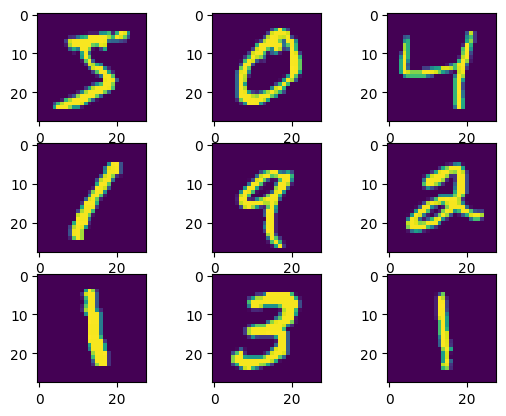

In [54]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

training_data = MNIST(root='./', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./', train=False, download=True, transform=ToTensor())

print(len(training_data))
print(len(test_data))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(training_data.data[i])
plt.show()

In [56]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [58]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    nn.Linear(784, 64),    # 28*28 이미지이므로 입력은 784
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
    print(f'epoch{epoch+1} loss:{loss.item()}')
    
torch.save(model.state_dict(), 'MNIST.pth')

epoch1 loss:0.09949928522109985
epoch2 loss:0.19984778761863708
epoch3 loss:0.029435528442263603
epoch4 loss:0.07967056334018707
epoch5 loss:0.08035953342914581
epoch6 loss:0.020834390074014664
epoch7 loss:0.01778433471918106
epoch8 loss:0.013214449398219585
epoch9 loss:0.014156641438603401
epoch10 loss:0.08170398324728012
epoch11 loss:0.18103547394275665
epoch12 loss:0.025845201686024666
epoch13 loss:0.010865136981010437
epoch14 loss:0.0132585559040308
epoch15 loss:0.09153459221124649
epoch16 loss:0.04306543990969658
epoch17 loss:0.026050489395856857
epoch18 loss:0.001231323229148984
epoch19 loss:0.14380043745040894
epoch20 loss:0.004615066573023796


In [59]:
model.load_state_dict(torch.load('MNIST.pth', map_location=device))
num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data,(-1,784)).to(device)
        
        output = model(data.to(device))
        preds = output.data.max(1)[1]
        
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr
    print(f'accuracy: {num_corr / len(test_data)}')

accuracy: 0.9765
